In [2]:
import tensorflow as tf

In [2]:
sess = tf.InteractiveSession()
a = tf.one_hot([[0],[1],[2],[3]],depth=4).eval()

In [6]:
tf.cast([1.3,3,9,3,],dtype=tf.int32)

tf.reduce_mean(tf.cast([True, False, 1==1, 1!=1], tf.float32)).eval()

0.5

In [9]:
# x_train = [1,2,3]
# y_train = [11,20,29]
# # w = 9, b = 2

#초기화
W = tf.Variable(tf.random_normal([1]), name = 'weight') #variable은 초기화를 해줘야한다 항상
b = tf.Variable(tf.random_normal([1]), name = 'bias')


X = tf.placeholder(tf.float32, shape=[None]) #shape None이기 때문에 n개가 들어올 수 있다 3,4,5 모두가능
Y = tf.placeholder(tf.float32, shape=[None])

#기준
hypothesis = X *W + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))

#방식
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

In [10]:

sess = tf.Session()
sess.run(tf.global_variables_initializer()) #내가보고있는 그래프의 베리어블을 초기화한다

for step in range(5000):
    i,c,w,k = sess.run([train, cost, W, b], feed_dict = {X:[1,2,3], Y:[9,18,27]})
    if step %100==0:
        print('Step : ',step, 'Cost:',c,
             'W : ', w,
             'b :', k )

Step :  0 Cost: 490.63547 W :  [-0.07709128] b : [-0.09975076]
Step :  100 Cost: 0.9478321 W :  [7.8719206] b : [2.5642266]
Step :  200 Cost: 0.5857029 W :  [8.113275] b : [2.0157368]
Step :  300 Cost: 0.36192945 W :  [8.302952] b : [1.5845531]
Step :  400 Cost: 0.22365004 W :  [8.452057] b : [1.2456034]
Step :  500 Cost: 0.13820225 W :  [8.569267] b : [0.9791572]
Step :  600 Cost: 0.08540068 W :  [8.661405] b : [0.76970726]
Step :  700 Cost: 0.052772313 W :  [8.733833] b : [0.60505944]
Step :  800 Cost: 0.03261027 W :  [8.790769] b : [0.47563252]
Step :  900 Cost: 0.02015119 W :  [8.835525] b : [0.37389204]
Step :  1000 Cost: 0.012452158 W :  [8.8707075] b : [0.29391095]
Step :  1100 Cost: 0.0076946877 W :  [8.898364] b : [0.23104219]
Step :  1200 Cost: 0.004754935 W :  [8.920104] b : [0.1816213]
Step :  1300 Cost: 0.0029382512 W :  [8.937195] b : [0.14277093]
Step :  1400 Cost: 0.0018156726 W :  [8.950629] b : [0.11223197]
Step :  1500 Cost: 0.0011220135 W :  [8.961189] b : [0.088225

# PD Classification

In [1]:
%matplotlib
import sys
import os
from io import StringIO
sys.path.append('./DemoPD/Common')
sys.path.append('./TestData')
import tensorflow as tf
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import datetime 
import numpy as np
from getDataPD import runSQL_Insert, getDataPD, getMlData, runMlSQL_Insert
from sklearn.model_selection import train_test_split
import io
from PIL import Image
# import seaborn as sns

Using matplotlib backend: agg


## 데이터 불러오기 (Class 별 500)

In [2]:
#void
void_sql = " SELECT * " +\
      " FROM pd_classf_train_data " +\
      " WHERE DATA_SERNO between 1 and 500"
void = getMlData(void_sql)

#surface
surface_sql = " SELECT * " +\
      " FROM pd_classf_train_data " +\
      " WHERE DATA_SERNO between 8344 and 8843"
surface = getMlData(surface_sql)

#coronaP
coronaP_sql = " SELECT * " +\
      " FROM pd_classf_train_data " +\
      " WHERE DATA_SERNO between 16687 and 17186"
coronaP = getMlData(coronaP_sql)

#coronaN
coronaN_sql = " SELECT * " +\
      " FROM pd_classf_train_data " +\
      " WHERE DATA_SERNO between 20531 and 21030"
coronaN = getMlData(coronaN_sql)


# 데이터 전처리

* X, Y, CNT transform

In [3]:
#void preprocessing
void_list = []
for index, row in void.iterrows():
    void_list.append(row['PRPD_CONT'])
    
void_prpd=[]
columns = ['X', 'Y', 'CNT']
for i in range(len(void_list)): 
    prpd_ = pd.read_csv(StringIO(void_list[i]), delimiter = ',', encoding = 'utf-8', names = columns)
    void_prpd.append(prpd_)

In [4]:
#surface preprocessing
surface_list = []
for index, row in surface.iterrows():
    surface_list.append(row['PRPD_CONT'])
    
surface_prpd=[]
columns = ['X', 'Y', 'CNT']
for i in range(len(surface_list)): 
    prpd_ = pd.read_csv(StringIO(surface_list[i]), delimiter = ',', encoding = 'utf-8', names = columns)
    surface_prpd.append(prpd_)

In [5]:
#coronaP preprocessing
coronaP_list = []
for index, row in coronaP.iterrows():
    coronaP_list.append(row['PRPD_CONT'])
    
coronaP_prpd=[]
columns = ['X', 'Y', 'CNT']
for i in range(len(coronaP_list)): 
    prpd_ = pd.read_csv(StringIO(coronaP_list[i]), delimiter = ',', encoding = 'utf-8', names = columns)
    coronaP_prpd.append(prpd_)

In [6]:
#coronaN preprocessing
coronaN_list = []
for index, row in coronaN.iterrows():
    coronaN_list.append(row['PRPD_CONT'])
    
coronaN_prpd=[]
columns = ['X', 'Y', 'CNT']
for i in range(len(coronaN_list)): 
    prpd_ = pd.read_csv(StringIO(coronaN_list[i]), delimiter = ',', encoding = 'utf-8', names = columns)
    coronaN_prpd.append(prpd_)

+ validation

In [16]:
# make an agg figure
# fig, ax = plt.subplots();
plt.figure(figsize=(3,2))
plt.scatter(void_prpd[49]['X'], void_prpd[49]['Y'], s=0.05);
plt.ylim(0,360)
plt.xlim(0,360)
buf = io.BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
im =np.array(Image.open(buf).convert('RGB'))

# fig.canvas.draw();
# grab the pixel buffer and dump it into a numpy array
# X = np.array(fig.canvas.renderer._renderer)
# plt.clf()
# X.shape

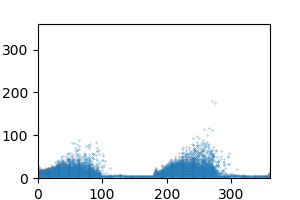

In [18]:
Image.fromarray(im)

(288, 432, 4)

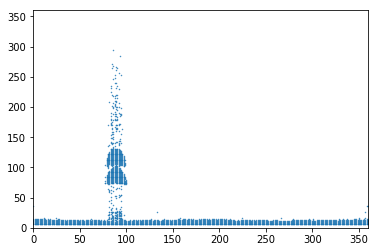

In [9]:
# make an agg figure
plt.figure(figsize=(3,2))
ax.scatter(coronaP_prpd[2]['X'], coronaP_prpd[2]['Y'], s=0.05)
plt.ylim(0,360)
plt.xlim(0,360)
buf = io.BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
im =np.array(Image.open(buf).convert('L'))

# grab the pixel buffer and dump it into a numpy array
X2 = np.array(fig.canvas.renderer._renderer)
X2.shape

In [ ]:
# make an agg figure
fig, ax = plt.subplots()
ax.scatter(surface_prpd[2]['X'], surface_prpd[2]['Y'], s=0.2,)
plt.ylim(0,360)
plt.xlim(0,360)
# ax.set_title('a simple figure')
fig.canvas.draw()

# grab the pixel buffer and dump it into a numpy array
X3 = np.array(fig.canvas.renderer._renderer)
X3.shape

- reshape

In [47]:


# for i in range(len(void_prpd)):
#     # make an agg figure
#     fig, ax = plt.subplots()
#     ax.scatter(void_prpd[i]['X'], void_prpd[i]['Y'], s=0.2)
#     plt.ylim(0,360)
#     plt.xlim(0,360)
#     # ax.set_title('a simple figure')
#     fig.canvas.draw()

#     # grab the pixel buffer and dump it into a numpy array
#     x = np.array(fig.canvas.renderer._renderer)
#     x_reshape = x.reshape(-1)
#     plt.clf();
#     data.append(x_reshape)


/home/ximz/anaconda3/envs/sdams/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
data = []
for j in [void_prpd, surface_prpd, coronaP_prpd, coronaN_prpd]:
    for i in range(len(j)):
        # make an agg figure
        plt.figure(figsize=(3,2))
        plt.scatter(void_prpd[49]['X'], void_prpd[49]['Y'], s=0.05);
        plt.ylim(0,360)
        plt.xlim(0,360)
     
        buf = io.BytesIO()
        plt.savefig(buf, format='png')
        buf.seek(0)
        im =np.array(Image.open(buf).convert('L'))
        data.append(im)
        plt.clf();

/home/ximz/anaconda3/envs/sdams/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [24]:
data_ = np.array(data)
data_.shape

(803, 200, 300)

# 전처리 후  저장

In [2]:
%matplotlib
import sys
import os
from io import StringIO
sys.path.append('./DemoPD/Common')
sys.path.append('./TestData')
import tensorflow as tf
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import datetime 
import numpy as np
from getDataPD import runSQL_Insert, getDataPD, getMlData, runMlSQL_Insert
from sklearn.model_selection import train_test_split
import io
from PIL import Image
# import seaborn as sns

Using matplotlib backend: agg


In [3]:
#저장
# np.save('dataset',data_)

#로드
data = np.load('dataset.npy')
data.shape

(803, 200, 300)

In [4]:
y = np.zeros([803,4])
y[200:401,1] = 1
y[401:602, 2] = 1
y[602:803, 3] = 1
y.shape

(803, 4)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.2)

# CNN modeling

In [7]:
learning_rate = 0.001
training_epoch = 500
minibatch_size = 4

In [8]:

training = tf.placeholder(tf.bool)
X = tf.placeholder(tf.float32 , shape = [None, 200,300 ])
Y = tf.placeholder(tf.int32, shape = [None, 4])
X_img = tf.reshape(X, [-1, 200, 300, 1])

conv1 = tf.layers.conv2d(inputs = X_img, filters = 32, kernel_size = [3,3], padding='SAME', activation = tf.nn.relu)
pool1 = tf.layers.max_pooling2d(inputs = conv1, pool_size=[2,2], padding='SAME', strides = 2)
dropout1 = tf.layers.dropout(inputs = pool1, rate = 0.7, training = training)
#after shape(100, 150)

conv2 = tf.layers.conv2d(inputs = dropout1, filters = 64, kernel_size=[3,3], padding='SAME',activation = tf.nn.relu)
pool2 = tf.layers.max_pooling2d(inputs = conv2, pool_size=[2,2], padding='SAME', strides=2)
dropout2 = tf.layers.dropout(inputs = pool2, rate=0.7, training = training)
#after shape(50, 75)

conv3 = tf.layers.conv2d(inputs = dropout2, filters = 128, kernel_size=[3,3], padding = 'SAME', activation = tf.nn.relu)
pool3 = tf.layers.max_pooling2d(inputs = conv3, pool_size = [2,2], padding='SAME', strides = 2)
dropout3 = tf.layers.dropout(inputs = pool3, rate = 0.5, training=training)
#after shape(25, 38)

flat = tf.reshape(dropout3 , [-1, 25*38*128])
dense4 = tf.layers.dense(inputs = flat, units = 625, activation = tf.nn.relu)
dropout4 = tf.layers.dropout(inputs = dense4, rate=0.5, training = training)

logits = tf.layers.dense(inputs = dropout4, units = 4)
hypothesis = tf.nn.softmax(logits)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = Y))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

n_mb = training_epoch//minibatch_size

for i in range(training_epoch):
    for j in range(n_mb):
        _, c = sess.run([optimizer, cost], feed_dict={X:X_train[j: (j+1)*minibatch_size], Y: y_train[j: (j+1)*minibatch_size],
                                                      training:True})
    _, c = sess.run([optimizer, cost], feed_dict = {X: X_train[n_mb * minibatch_size : ], Y: y_train[n_mb * minibatch_size : ],
                                                    training:True })
    print('cost : ',c)
#     if i%1 ==0:
#         print('cost: ',c)